The description you provided outlines a data mining process that follows the Cross-Industry Standard Process for Data Mining (CRISP-DM) model. This model is a widely accepted framework for data mining projects and consists of six phases: 

1) business understanding, 
2) data understanding,
3) data preparation, 4) modeling, 
5) evaluation, and 
6) deployment.

    - The business understanding phase involves establishing the project's goals and creating a plan.

    - The data understanding phase involves collecting and exploring the data to understand its characteristics and potential patterns.
 
    - In the data preparation phase, the data is transformed and cleaned to be used in the modeling phase, where a machine learning model is chosen and trained on the prepared data.

    - The model's performance is then evaluated in the evaluation phase to determine if it meets the business objectives. 
   

    - Based on this evaluation, the model is either deployed in a production environment or further refined.

What is the objective of the machine learning model?

We aim to predict the real transactions fraud and the fraud estimated by our model. We will evaluate model performance with the:

    F beta score

    ROC AUC score

    PR AUC score | Average precision

#### Read data

In [129]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


np.random.seed(10)

In [285]:
np.random.choice(4)

3

In [2]:
# Load the training data
df = pd.read_csv("data/transactions_train.csv")

# Preview the data
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1


In [ ]:
type', 'amount','oldbalanceOrig','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',

In [280]:
df[numeric_columns]

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9.839640e+03,1.701360e+05,160296.359375,0.000000,0.000000e+00,0
1,1,1.864280e+03,2.124900e+04,19384.720703,0.000000,0.000000e+00,0
2,1,1.810000e+02,1.810000e+02,0.000000,0.000000,0.000000e+00,1
3,1,1.810000e+02,1.810000e+02,0.000000,21182.000000,0.000000e+00,1
4,1,1.166814e+04,4.155400e+04,29885.859375,0.000000,0.000000e+00,0
...,...,...,...,...,...,...,...
6351188,699,1.623265e+05,1.623265e+05,0.000000,0.000000,0.000000e+00,1
6351189,699,1.623265e+05,1.623265e+05,0.000000,0.000000,1.623265e+05,1
6351190,699,2.763398e+06,2.763398e+06,0.000000,0.000000,0.000000e+00,1
6351191,699,2.763398e+06,2.763398e+06,0.000000,339515.343750,3.102914e+06,1


In [239]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'classname'],
      dtype='object')

In [240]:
df.type.unique()

['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']
Categories (5, object): ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

In [241]:
dict(enumerate( ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']))

{0: 'CASH_IN', 1: 'CASH_OUT', 2: 'DEBIT', 3: 'PAYMENT', 4: 'TRANSFER'}

In [244]:
{v:k for k,v in {0: 'CASH_IN', 1: 'CASH_OUT', 2: 'DEBIT', 3: 'PAYMENT', 4: 'TRANSFER'}.items()}

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 10 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int16   
 1   type            category
 2   amount          float32 
 3   nameOrig        category
 4   oldbalanceOrig  float32 
 5   newbalanceOrig  float32 
 6   nameDest        category
 7   oldbalanceDest  float32 
 8   newbalanceDest  float32 
 9   isFraud         int8    
dtypes: category(3), float32(5), int16(1), int8(1)
memory usage: 456.4 MB


# Data Understanding

Exploring and understanding the data is an important step in the data mining process. In the data understanding phase, you can perform a variety of analyses to gain insights into the characteristics of the data and identify any potential issues or challenges.

Here are some of the things you might consider when exploring and analyzing the data:

    The target variable: The target variable is the variable that you are trying to predict or classify. It is important to understand the distribution and characteristics of the target variable and how it is related to the other variables in the dataset.

    Variable types: There are two main types of variables: categorical and numerical. Numerical variables can be further divided into discrete variables (such as integer values) and continuous variables (such as real numbers). It is important to understand the different types of variables in the dataset and how they can be used in modeling.

    Distributions: Examining the distribution of the variables can give you insight into the underlying patterns and relationships in the data. For example, if a variable is skewed or has outliers, this could impact the performance of certain models.

    Transformations: Sometimes it may be necessary to transform variables to make them more suitable for modeling. For example, you might take the log of a skewed variable to make it more normally distributed.

    Cardinality: Cardinality refers to the number of unique categories in a categorical variable. High cardinality can be challenging for some models, so it may be necessary to group or merge categories in order to improve model performance.

    Rare labels: If a categorical variable has many rare labels, it may be challenging to accurately predict those categories. One option is to group the rare labels into a single "other" category.

    Special mappings: Some categorical variables may have special meaning or significance that needs to be preserved. For example, if a variable has a "male" and "female" category, it would not be appropriate to merge them into a single "gender" category.

    Null data: Missing or null data can be a challenge in modeling. It may be necessary to impute missing values or drop rows with too many missing values.

    Text data: Text data can be challenging to work with in modeling. One option is to convert the text to numerical values using techniques such as term frequency-inverse document frequency (TF-IDF).

    Outliers: Outliers can have a significant impact on model performance and should be carefully examined and handled if necessary.

    Curse of dimensionality: The curse of dimensionality refers to the challenges that arise when working with high-dimensional data. In high-dimensional datasets, it can be difficult to find patterns and relationships and some models may not perform well. It may be necessary to reduce the number of dimensions in the dataset through techniques such as feature selection or dimensionality reduction.

In [4]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

df= reduce_mem_usage(df)

Memory usage of dataframe is 381.59 MB
Memory usage after optimization is: 456.44 MB
Decreased by -19.6%


#### Null Data

It can be determined how sparse the data is by checking for missing values, which are often represented as NaN (Not a Number). Using Pandas, the number of missing values in each column can be easily checked.





In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 10 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int16   
 1   type            category
 2   amount          float32 
 3   nameOrig        category
 4   oldbalanceOrig  float32 
 5   newbalanceOrig  float32 
 6   nameDest        category
 7   oldbalanceDest  float32 
 8   newbalanceDest  float32 
 9   isFraud         int8    
dtypes: category(3), float32(5), int16(1), int8(1)
memory usage: 456.4 MB


In [6]:
df.dropna(inplace=True)

In [7]:
# view columns
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

In [9]:
# view num of missing entries in each column
total_nulls = df.isnull().sum().values

for col, tn in zip(df.columns, total_nulls):
    print(col, ' -> ', tn)

step  ->  0
type  ->  0
amount  ->  0
nameOrig  ->  0
oldbalanceOrig  ->  0
newbalanceOrig  ->  0
nameDest  ->  0
oldbalanceDest  ->  0
newbalanceDest  ->  0
isFraud  ->  0


In [10]:
# summarize the number of rows with missing values for each column
for i in range(df.shape[1]):
    # count number of rows with missing values
    n_miss = df.iloc[:,i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)


#### Duplicates Data

In [11]:
df.duplicated().sum()

0

In [12]:
len(df)-len(df.drop_duplicates())

0

### Outlier Identification

Skewness is a measure of the asymmetry of a distribution. A distribution is skewed if it is not symmetrical, meaning that it has more values on one side than the other. There are two types of skewness: positive skewness and negative skewness.

Positive skewness refers to a distribution that is skewed to the right, with a long tail on the positive side. This means that there are more values on the right side of the distribution, and the mean is generally greater than the median.

Negative skewness refers to a distribution that is skewed to the left, with a long tail on the negative side. This means that there are more values on the left side of the distribution, and the mean is generally less than the median.

In [13]:
skew =df.skew().sort_values(ascending =False )
skew_df= pd.DataFrame({'skew':skew})
skew_df.head(10)

/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_36248/2311675111.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew =df.skew().sort_values(ascending =False )


,skew
amount,31.050928
isFraud,28.635901
oldbalanceDest,19.934164
newbalanceDest,19.362310
oldbalanceOrig,5.243790
newbalanceOrig,5.172421
step,0.338249


Positive skewness was indicated in the skewness results provided for the variables "amount," "isFraud," "oldbalanceDest," "newbalanceDest," and "oldbalanceOrig," which show that they are skewed to the right. Negative skewness was indicated in the skewness result for the variable "newbalanceOrig," which shows that it is skewed to the left. A very low skewness was indicated in the skewness result for the variable "step," which shows that it is relatively symmetrical.

"Amount" has a skewness of 31.050928, which is a very high value. This suggests that the distribution of the "amount" variable is heavily skewed to the right, with a long tail of high values. This could indicate the presence of outliers or extreme values in the data, which could have a significant impact on the model.

"IsFraud" has a skewness of 28.635901, which is also a very high value. This suggests that the distribution of the "isFraud" variable is heavily skewed to the right, with a long tail of high values. This could indicate that there are relatively few fraudulent transactions in the dataset, which could make it challenging to accurately predict fraud.

"OldbalanceDest" has a skewness of 19.934164, which is a high value. This suggests that the distribution of the "oldbalanceDest" variable is skewed to the right, with a long tail of high values. This could indicate the presence of outliers or extreme values in the data.

"NewbalanceDest" has a skewness of 19.362310, which is also a high value. This suggests that the distribution of the "newbalanceDest" variable is skewed to the right, with a long tail of high values. This could also indicate the presence of outliers or extreme values in the data.

"OldbalanceOrig" has a skewness of 5.243790, which is a moderate value. This suggests that the distribution of the "oldbalanceOrig" variable is skewed to the right, but not as heavily as the other variables.

"NewBalanceOrig" has a skewness of 5.172421, which is also a moderate value. This suggests that the distribution of the "newbalanceOrig" variable is skewed to the left, but not as heavily as some of the other variables.

"Step" has a skewness of 0.338249, which is a very low value. This suggests that the distribution of the "step" variable is relatively symmetrical and not heavily skewed in either direction.

The skewness results indicate that several variables in the dataset have skewed distributions, with positive skewness being more common. This could be a problem in modeling and may necessitate some transformation or preprocessing to address it.

/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


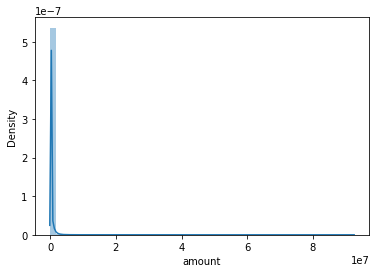

In [16]:
import seaborn as sns

# plot displot on the amount
ax = sns.distplot(df['amount'])

<AxesSubplot:>

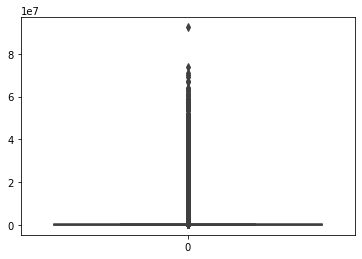

In [18]:
sns.boxplot(data=df['amount'], saturation=.3)

The values are typically represented on the x-axis, and the count or frequency of those values is represented on the y-axis. The values in the provided dataset appear to have a wide range, with some occurring more frequently than others. There are several very high values, such as 6351190 and 6351191, which could be considered outliers, as well as several low values that occur relatively infrequently.

#### moderate the amount

In [19]:
amount_corrected= np.log(df['amount' ]+1)

print(df['amount'].skew())

print(amount_corrected.skew())

31.050928
-0.55496657


/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


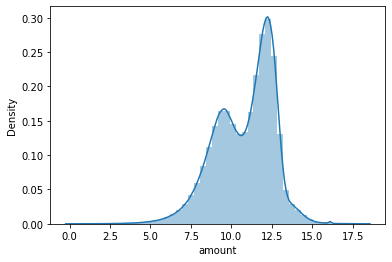

In [20]:
ax = sns.distplot(amount_corrected)

#### Statistic Analysis: shape , mean,median.

In [22]:
# shape of our df data 
df.shape

(6351193, 10)

In [23]:
# stat Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6351193.0,2.425553e+02,1.410676e+02,1.0,155.000000,238.000000,3.340000e+02,699.0
amount,6351193.0,1.779492e+05,5.989233e+05,0.0,13388.290039,74864.828125,2.087152e+05,92445520.0
oldbalanceOrig,6351193.0,8.255676e+05,2.833390e+06,0.0,0.000000,14153.000000,1.073460e+05,59585040.0
newbalanceOrig,6351193.0,8.513991e+05,2.864732e+06,0.0,0.000000,0.000000,1.443652e+05,49585040.0
oldbalanceDest,6351193.0,1.098221e+06,3.369198e+06,0.0,0.000000,133086.546875,9.438661e+05,356015904.0
newbalanceDest,6351193.0,1.222152e+06,3.630087e+06,0.0,0.000000,214919.015625,1.112791e+06,356179264.0
isFraud,6351193.0,1.215047e-03,3.483635e-02,0.0,0.000000,0.000000,0.000000e+00,1.0


A statistical analysis was conducted on a dataset with six variables: "step,"  "amount,"  "oldbalanceOrig,"  "newbalanceOrig,"  "oldbalanceDest,"  and "newbalanceDest." The analysis calculated various statistical measures for each variable, including count, mean, standard deviation, minimum, maximum, and percentiles (25%, 50%, and 75%). The results indicated that the variables had different counts, means, standard deviations, minimum and maximum values, and percentiles. 

From table, some variables, such as "step," had low variance and were evenly distributed, while others, such as "amount" and "oldbalanceDest," had higher variance and were more skewed or peaked. The "isFraud" variable had a mean of 0.00121, a standard deviation of 0.0348, and a range of values from 0 to 1, with all percentiles equal to 0.

### Visual Exploratory

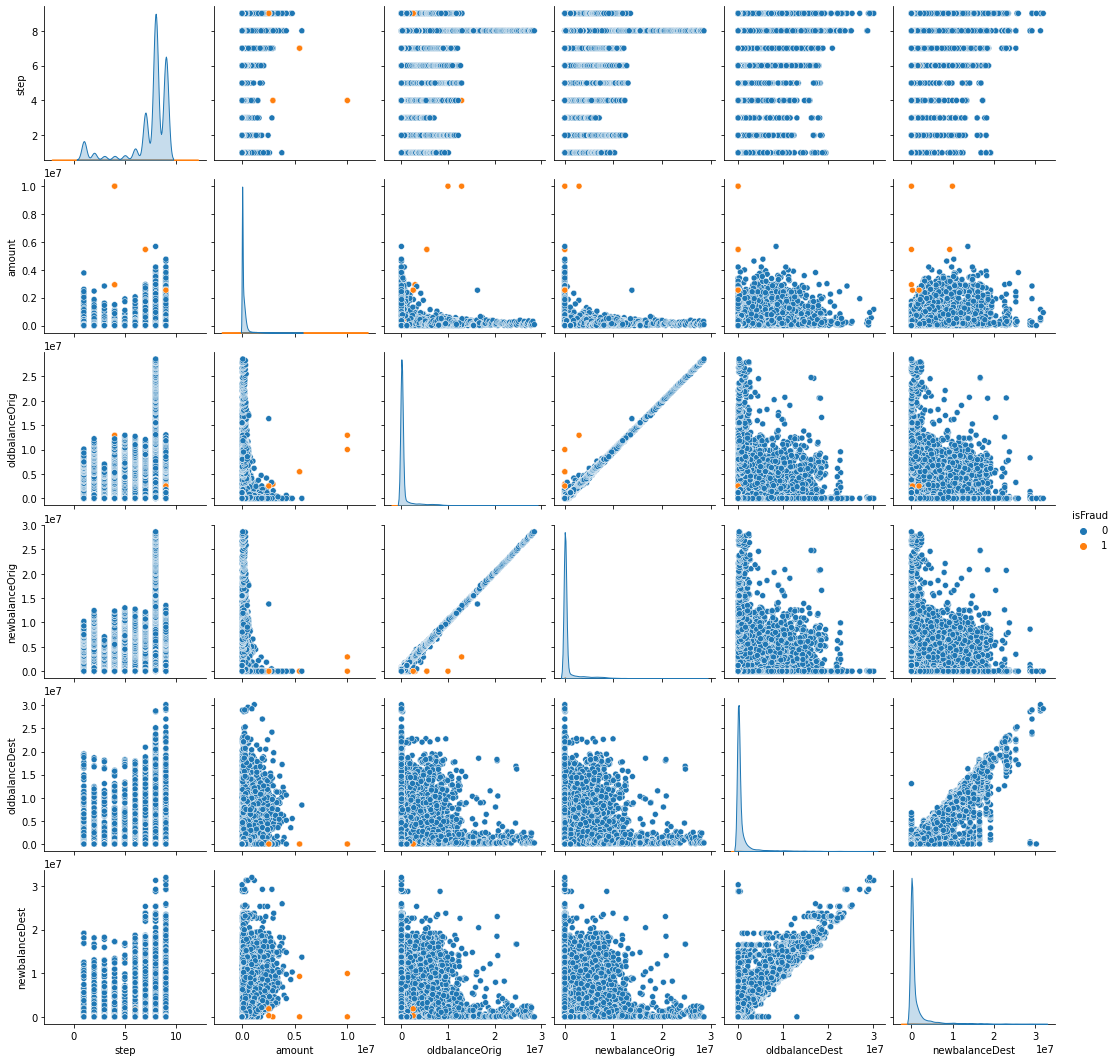

In [24]:
sns.pairplot(df.iloc[0:50000], hue= 'isFraud')

##### Correlation Matrix

In [4]:
import matplotlib.pyplot as plt 

<AxesSubplot:>

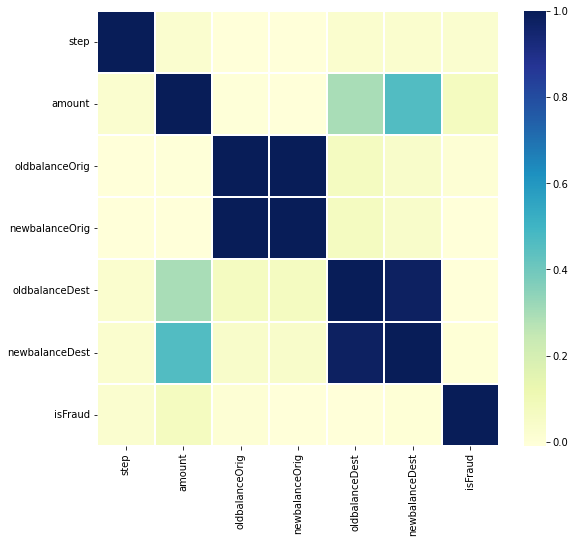

In [30]:
corrmat = df.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)


In [34]:
corrmat

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022354,-0.009113,-0.009201,0.028303,0.026508,0.025495
amount,0.022354,1.000000,-0.003543,-0.008153,0.294792,0.460065,0.073346
oldbalanceOrig,-0.009113,-0.003543,1.000000,0.998857,0.066301,0.042019,0.009226
newbalanceOrig,-0.009201,-0.008153,0.998857,1.000000,0.067852,0.041853,-0.008322
oldbalanceDest,0.028303,0.294792,0.066301,0.067852,1.000000,0.976550,-0.005657
newbalanceDest,0.026508,0.460065,0.042019,0.041853,0.976550,1.000000,0.000496
isFraud,0.025495,0.073346,0.009226,-0.008322,-0.005657,0.000496,1.000000


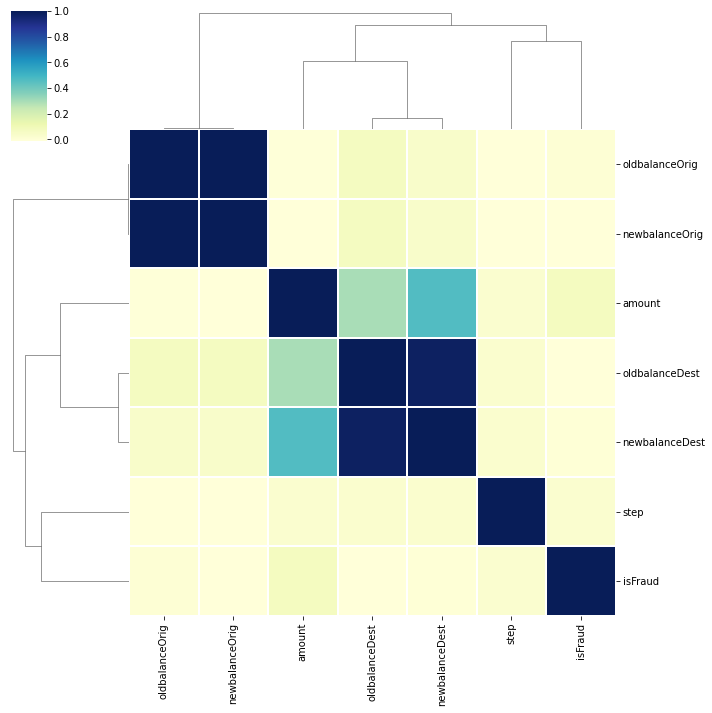

In [31]:
corrmat = df.corr()

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

cg


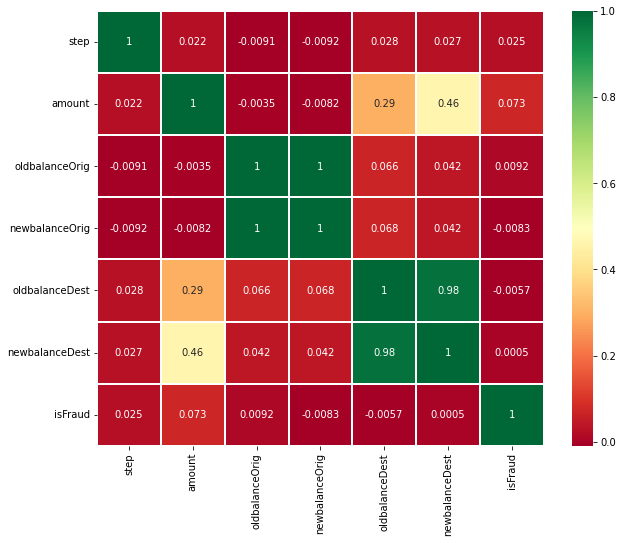

In [35]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

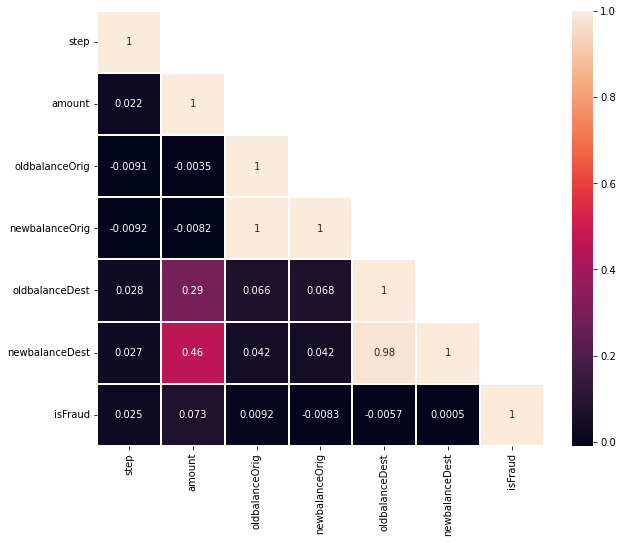

In [41]:
df_lt = corrmat.where(np.tril(np.ones(corrmat.shape)).astype(np.bool_))
hmap=sns.heatmap(df_lt, annot=True, linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

The matrix shows that the variables "step," "amount," "oldbalanceOrig," "newbalanceOrig," "oldbalanceDest," and "newbalanceDest" have low correlations with the "isFraud" variable, with the highest correlation being 0.073346 for "amount." This indicates that there is not a strong relationship between these variables and "isFraud." 

On the other hand, the variables "oldbalanceOrig," "newbalanceOrig," "oldbalanceDest," and "newbalanceDest" have strong positive correlations with each other, ranging from 0.998857 to 1, indicating that these variables are closely related and potentially highly correlated with one another.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'CASH_IN'),
  Text(1, 0, 'CASH_OUT'),
  Text(2, 0, 'DEBIT'),
  Text(3, 0, 'PAYMENT'),
  Text(4, 0, 'TRANSFER')])

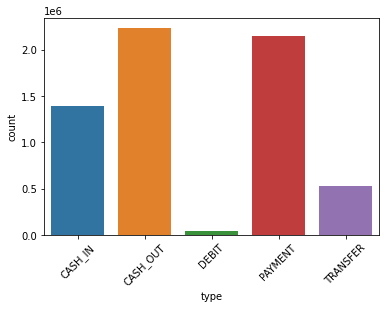

In [42]:
g= sns.countplot(x='type', data=df)
plt.xticks(rotation=45)

From this analysis, we could see the clients cashout more than they Cashin. Next is the payment where it seems like there are more payment done they transfer. There is a low transfer rate and lastly Debit has a lowest count . 

In [44]:
df['type']

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6351188    TRANSFER
6351189    CASH_OUT
6351190    TRANSFER
6351191    CASH_OUT
6351192       DEBIT
Name: type, Length: 6351193, dtype: category
Categories (5, object): ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

In [7]:
# Convert Dtypes
df[df.select_dtypes(['int64','int16','float32',
                     'float64','int8']).columns] = df[df.select_dtypes(['int64',
                                              'int16','float32','float64','int8']).columns].apply(pd.to_numeric)


df[df.select_dtypes(['object','category']).columns] = df.select_dtypes(['object',
                                                        'category']).apply(lambda x: x.astype('category'))


#### Tranformation

Based on the information you provided, it appears that the "amount" variable has a skew of 31.050928, the "oldbalanceDest" and 'newbalanceDest' variable has a skew of 19.934164 and 19.93623 respectively. isFraud is not included since it our actual label. These values indicate that the distributions of these variables are skewed, with a longer tail on one side of the distribution.

We intend to 

In [54]:
from scipy.stats.mstats import winsorize

# x_winsorized = winsorize(x, limits=[0.05, 0.05])


using pca on the data

In [56]:
few_df = df[:1000].copy()

In [57]:
few_df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [58]:
few_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

In [63]:
few_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1000 non-null   int64  
 1   type            1000 non-null   object 
 2   amount          1000 non-null   float64
 3   nameOrig        1000 non-null   object 
 4   oldbalanceOrig  1000 non-null   float64
 5   newbalanceOrig  1000 non-null   float64
 6   nameDest        1000 non-null   object 
 7   oldbalanceDest  1000 non-null   float64
 8   newbalanceDest  1000 non-null   float64
 9   isFraud         1000 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 78.2+ KB


since we have numerical and categorical datatypes lets separate them.

In [81]:
# n = []
# c = []

# for i in few_df.columns:
#     the_type = type(few_df[i][0])
    
#     if the_type == str:
#         c.append(i)
#     else:
#         n.append(i)
    

In [263]:
# df['step'].unique()

In [8]:
numeric_columns = ['step',
 'amount',
 'oldbalanceOrig',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud']

categorical_columns = ['type', 'nameOrig', 'nameDest']

In [90]:
for i in categorical_columns:
    print(df[i].value_counts())

CASH_OUT    2233369
PAYMENT     2147832
CASH_IN     1396865
TRANSFER     531817
DEBIT         41310
Name: type, dtype: int64
C1832548028    3
C724452879     3
C400299098     3
C2051359467    3
C545315117     3
              ..
C2139841299    1
C1632854026    1
C819112946     1
C1387224335    1
C700991352     1
Name: nameOrig, Length: 6341907, dtype: int64
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M2075368573      1
M465464374       1
M2030044495      1
M659702752       1
C619602282       1
Name: nameDest, Length: 2716810, dtype: int64


In [93]:
df['type'].value_counts()

CASH_OUT    2233369
PAYMENT     2147832
CASH_IN     1396865
TRANSFER     531817
DEBIT         41310
Name: type, dtype: int64

In [95]:
df['nameOrig'].value_counts()

C1832548028    3
C724452879     3
C400299098     3
C2051359467    3
C545315117     3
              ..
C2139841299    1
C1632854026    1
C819112946     1
C1387224335    1
C700991352     1
Name: nameOrig, Length: 6341907, dtype: int64

In [94]:
df['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M2075368573      1
M465464374       1
M2030044495      1
M659702752       1
C619602282       1
Name: nameDest, Length: 2716810, dtype: int64

'nameOrig' and 'nameDest' is not needed for pca. we can use the 'type' by label encoding it.

lets label the 'type' categorical values

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# get column
cat_X = df['type']

# Fit the label encoder to the categorical data
le.fit(cat_X)

# Transform the categorical data to numerical values
X_transformed = le.transform(cat_X)


In [10]:
X_transformed

array([3, 3, 4, ..., 4, 1, 2])

In [11]:
df.dropna(inplace=True)

In [264]:
X.columns

Index(['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'typeNum'],
      dtype='object')

In [278]:
y = df['isFraud'].values

X = df[numeric_columns]#.values
# X = df[[ 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
#        'newbalanceDest']]#.values


In [279]:
X

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9.839640e+03,1.701360e+05,160296.359375,0.000000,0.000000e+00,0
1,1,1.864280e+03,2.124900e+04,19384.720703,0.000000,0.000000e+00,0
2,1,1.810000e+02,1.810000e+02,0.000000,0.000000,0.000000e+00,1
3,1,1.810000e+02,1.810000e+02,0.000000,21182.000000,0.000000e+00,1
4,1,1.166814e+04,4.155400e+04,29885.859375,0.000000,0.000000e+00,0
...,...,...,...,...,...,...,...
6351188,699,1.623265e+05,1.623265e+05,0.000000,0.000000,0.000000e+00,1
6351189,699,1.623265e+05,1.623265e+05,0.000000,0.000000,1.623265e+05,1
6351190,699,2.763398e+06,2.763398e+06,0.000000,0.000000,0.000000e+00,1
6351191,699,2.763398e+06,2.763398e+06,0.000000,339515.343750,3.102914e+06,1


In [269]:
X_transformed

array([3, 3, 4, ..., 4, 1, 2])

In [270]:
X['typeNum'] = X_transformed

In [271]:
X

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,typeNum
0,9.839640e+03,1.701360e+05,160296.359375,0.000000,0.000000e+00,3
1,1.864280e+03,2.124900e+04,19384.720703,0.000000,0.000000e+00,3
2,1.810000e+02,1.810000e+02,0.000000,0.000000,0.000000e+00,4
3,1.810000e+02,1.810000e+02,0.000000,21182.000000,0.000000e+00,1
4,1.166814e+04,4.155400e+04,29885.859375,0.000000,0.000000e+00,3
...,...,...,...,...,...,...
6351188,1.623265e+05,1.623265e+05,0.000000,0.000000,0.000000e+00,4
6351189,1.623265e+05,1.623265e+05,0.000000,0.000000,1.623265e+05,1
6351190,2.763398e+06,2.763398e+06,0.000000,0.000000,0.000000e+00,4
6351191,2.763398e+06,2.763398e+06,0.000000,339515.343750,3.102914e+06,1


In [130]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# pca = PCA()
# pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
# Xt = pipe.fit_transform(X)
# plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
# plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
# plt.show()

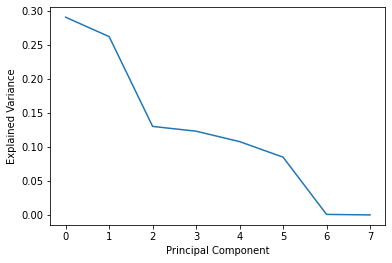

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA()

# standard scale and use pca
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])

# Fit the PCA to the data
pipe.fit(X)

# Get the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance by each principal component
plt.plot(explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()


This code will fit a PCA model to the data in X and create a plot showing the explained variance by each principal component. You can then choose the number of components by identifying the "elbow" in the plot.


Based on this we know the number of pca we should use, which is 2.

In [247]:
X

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeNum
0,1,9.839640e+03,1.701360e+05,160296.359375,0.000000,0.000000e+00,0,3
1,1,1.864280e+03,2.124900e+04,19384.720703,0.000000,0.000000e+00,0,3
2,1,1.810000e+02,1.810000e+02,0.000000,0.000000,0.000000e+00,1,4
3,1,1.810000e+02,1.810000e+02,0.000000,21182.000000,0.000000e+00,1,1
4,1,1.166814e+04,4.155400e+04,29885.859375,0.000000,0.000000e+00,0,3
...,...,...,...,...,...,...,...,...
6351188,699,1.623265e+05,1.623265e+05,0.000000,0.000000,0.000000e+00,1,4
6351189,699,1.623265e+05,1.623265e+05,0.000000,0.000000,1.623265e+05,1,1
6351190,699,2.763398e+06,2.763398e+06,0.000000,0.000000,0.000000e+00,1,4
6351191,699,2.763398e+06,2.763398e+06,0.000000,339515.343750,3.102914e+06,1,1


transform the given features into principal component

In [272]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a PCA object with n_components=2
pca = PCA(n_components=2)

# standard scale and use pca
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])

# Fit the PCA to the data
# pca.fit(X)
pipe.fit(X)


# Transform the data using the PCA object
X_pca = pipe.transform(X)


In [273]:
plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(y))
plt.show()

KeyboardInterrupt: 

# Modelling

Define the model features and target

In [16]:
df['classname'] = df['isFraud'].apply(lambda x: 'Fraud' if x==1 else 'Not Fraud')

In [17]:
from sklearn.metrics import accuracy_score

using PCA

Training with the full 5080954 pca features was not feasible, so we reduced the number to 500,000 in order to train the models. Using naive bayes, the training process was quick, but training with svm took 6 hours and did not produce results. We had to restart the kernel and use the 80,000 features instead.

we used 15434 due to the fact that the dataset has 7717 1 (is Fraud) label, model will be biased because there's more of 0's (not fraud) than there is 1 (is Fraud).

In [250]:
a = [1,2,3]
b = [4,5,6]

In [19]:
7717*2

15434

In [104]:
# Create a list of tuples where each tuple is a pair (X[i], y[i])
data = list(zip(X_pca, y))

# Shuffle the list of tuples
np.random.shuffle(data)

# Unpack the tuples back into X and y
_X_pca, _y = zip(*data)


In [106]:
# # To slice a pca feature in python, you can use the following code:

# # Assume that pca_features is a 2D array with shape (n_samples, n_features)
# # and that you want to slice the first m features of the pca_features array
# m = 10
# sliced_pca_features = pca_features[:, :m]

In [70]:
df.isFraud.value_counts()

0    6343476
1       7717
Name: isFraud, dtype: int64

In [168]:
len(_X_pca)

6351193

In [169]:
len(_y)

6351193

In [172]:
x_class_0 = []
x_class_1 = []

class_0 = []
class_1 = []


for i,j in zip(_X_pca, _y):
    if j == 0:
        x_class_0.append(i)
        class_0.append(j)
    else:
        x_class_1.append(i)
        class_1.append(j)
print('-done-')

In [173]:
len(x_class_0)

6343476

In [174]:
len(x_class_1)

7717

In [175]:
a = [1,2,3]
b = [4,5,6]

In [176]:
a+b

[1, 2, 3, 4, 5, 6]

In [70]:
df.isFraud.value_counts()

0    6343476
1       7717
Name: isFraud, dtype: int64

In [178]:
9717-10000

-283

In [179]:
7717+2283

10000

In [198]:
# needed_pca = x_class_0[:10000]
# needed_pca_y = class_0[:10000]

needed_pca = x_class_0[:20000]
needed_pca_y = class_0[:20000]

now we used 20000 of not a fraud pca features as we did with it y label. and use all of the 1's (is fraud) feaures in order to prevent imbalance training of the models.

In [199]:
# get all the pca's
all_needed_pca = needed_pca + x_class_1

In [200]:
len(all_needed_pca)

27717

In [201]:
# get all the y's
all_needed_pca_y = needed_pca_y + class_1

In [202]:
len(all_needed_pca_y)

27717

In [203]:
# # take = 5000

# # reduce_X_pca = X_pca[:take]
# # reduce_y = y[:take]

# take = 15434#5000#15434

# reduce_X_pca = _X_pca[:take]
# reduce_y = _y[:take]

In [204]:
# split the data
from sklearn.model_selection import train_test_split

# Split your data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(reduce_X_pca, reduce_y, test_size=0.2, 
#                                                     stratify=reduce_y )

X_train, X_test, y_train, y_test = train_test_split(all_needed_pca, all_needed_pca_y, test_size=0.2, 
                                                    stratify=all_needed_pca_y )

# X_train, X_test, y_train, y_test = train_test_split(reduce_X_pca, reduce_y, test_size=0.2, 
#                                                     stratify=reduce_y )


This will split the pca_feature_array and label_array into training and test sets, using 20% of the data for testing and the remaining 80% for training. The stratify parameter ensures that the proportion of each label in the training and test sets is the same as in the original dataset.

In [206]:


def plotConfMat(model, y_test, pred, title):
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    print(cm)
    print()
    
    print('True Positive:\t{}'.format(cm[0,0]))
    print('True Negative:\t{}'.format(cm[0,1]))
    print('False Positive:\t{}'.format(cm[1,0]))
    print('False Negative:\t{}'.format(cm[1,1]))
    print()
    
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('precision:\t{}'.format(precision))
    print('recall:\t{}'.format(recall))
    print('f1:\t{}'.format(f1))
    print()

    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(cm, annot=True,cmap='Greens',annot_kws={"size": 30},  fmt='g', ax=ax)
    plt.title(f"Confusion Matrix for {title}")
    plt.show()


naive bayes

In [207]:
from sklearn.naive_bayes import GaussianNB

In [208]:
# Import the GaussianNB classifier from scikit-learn
from sklearn.naive_bayes import GaussianNB

# Create an instance of the classifier
gnb = GaussianNB()

# Fit the classifier to the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
gnb_predictions = gnb.predict(X_test)

# Evaluate the model's performance
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print("Accuracy:", gnb_accuracy)


Accuracy: 0.7444083694083694


In [ ]:
accuracies = [0.74, 0.80]
precisions = [0.65, 0.76]
recalls = [0.18, 0.70]
f1_scores = [0.28, 0.73]
roc_scores = []


confusion matrix

[[3856  144]
 [1273  271]]

True Positive:	3856
True Negative:	144
False Positive:	1273
False Negative:	271

precision:	0.653012048192771
recall:	0.17551813471502592
f1:	0.27667177131189385



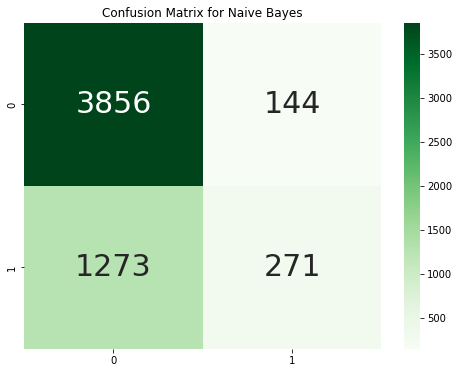

In [211]:
plotConfMat(gnb, y_test, gnb_predictions, 'Naive Bayes')

The naive Bayes model's findings on this dataset are not very compelling. The confusion matrix reveals that the model generated 1273 false positive predictions, 271 false negative predictions, 3856 true positive predictions, 144 true negative predictions, and 3856 true positive predictions. The model's accuracy was 0.65, which means that it correctly foresaw 65% of all favourable outcomes. With a recall of 0.18, the model successfully identified 18% of the dataset's actual positive cases. The model's harmonic mean of precision and recall, or F1 score, is 0.28. On the basis of these evaluation metrics, the model's performance also seems to be average.

roc score

ROC_AUC:  0.5697590673575129
fpr:  [0.    0.036 1.   ]
tpr:  [0.         0.17551813 1.        ]
thresholds:  [2 1 0]



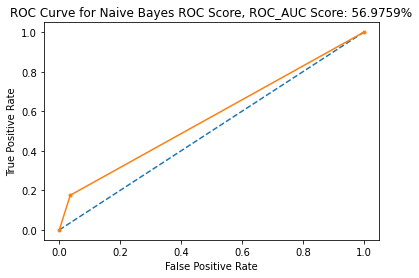

In [212]:
computeROCAUC(y_test,gnb_predictions, title='Naive Bayes ROC Score' )

The AUC ROC score for the Naive Bayes classifier is 0.57, which means that the classifier has a moderate ability to distinguish between the positive and negative cases in the dataset. The false positive rate (FPR) is 0.04 and the true positive rate (TPR) is 0.18. This means that out of all the actual negative cases in the dataset, the classifier correctly predicted 4% of them as negative, and out of all the actual positive cases, the classifier correctly predicted 18% of them as positive.

The precision of the classifier is 0.65, which means that out of all the cases predicted as positive by the classifier, 65% of them were actually positive. The recall of the classifier is 0.18, which means that out of all the actual positive cases in the dataset, the classifier correctly predicted 18% of them as positive. The F1 score, which is the harmonic mean of precision and recall, is 0.28. This suggests that the overall performance of the classifier is moderate.

SVM

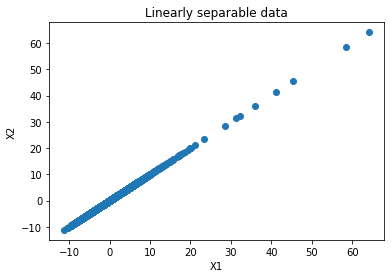

In [213]:
# Generate scatter plot for training data 
# plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(X_train, X_train)
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [214]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
logistic_reg = LogisticRegression()

# Fit the model to the training data
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
logr_y_pred = logistic_reg.predict(X_test)


# Evaluate the model's performance
logr_accuracy = accuracy_score(y_test, logr_y_pred)
print("Accuracy:", logr_accuracy)

Accuracy: 0.8584054834054834


In [215]:
# import SVC class
from sklearn.svm import SVC

# create an instance of the SVC class
raw_svm = SVC(kernel='linear',  C=1)

# fit the model to the training data
raw_svm.fit(X_train, y_train)

# predict on the test data
raw_svm_predictions = raw_svm.predict(X_test)

# Evaluate the model's performance
raw_svm_accuracy = accuracy_score(y_test, raw_svm_predictions)
print("Accuracy:", raw_svm_accuracy)


Accuracy: 0.8553391053391053


confusion matrix

[[3665  335]
 [ 467 1077]]

True Positive:	3665
True Negative:	335
False Positive:	467
False Negative:	1077

precision:	0.7627478753541076
recall:	0.697538860103627
f1:	0.7286874154262517



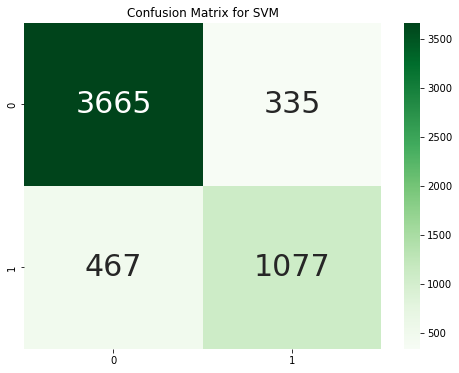

In [221]:
plotConfMat(raw_svm, y_test, raw_svm_predictions, 'SVM')

The confusion matrix for the SVM model shows that there were 3665 true positive cases, 335 true negative cases, 467 false positive cases, and 1077 false negative cases. This means that the model correctly identified 3665 cases as positive and 335 cases as negative, but also wrongly identified 467 cases as positive and 1077 cases as negative. The precision of the model is 0.76, which means that out of all the cases that were predicted as positive, 76% of them were actually positive. The recall of the model is 0.70, which means that the model was able to correctly identify 70% of the actual positive cases. The F1 score of the model is 0.73, which is the harmonic mean of precision and recall. Therefore, the performance of the model seems decent.

roc score

ROC_AUC:  0.8068944300518135
fpr:  [0.      0.08375 1.     ]
tpr:  [0.         0.69753886 1.        ]
thresholds:  [2 1 0]



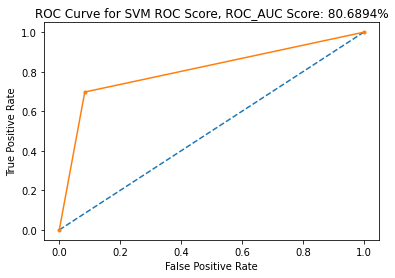

In [222]:
computeROCAUC(y_test,raw_svm_predictions, title='SVM ROC Score' )

The ROC AUC score for the SVM model is 0.80, which is relatively high. This indicates that the model has a good ability to distinguish between the positive and negative classes. The false-positive rate is relatively low, at about 8%, and the true-positive rate is relatively high, at about 70%. This suggests that the model is able to correctly identify a relatively large proportion of the positive cases while also avoiding a relatively large number of false positives. Lastly, these results suggest that the SVM model is performing well on this dataset.

plot and compare both of the models

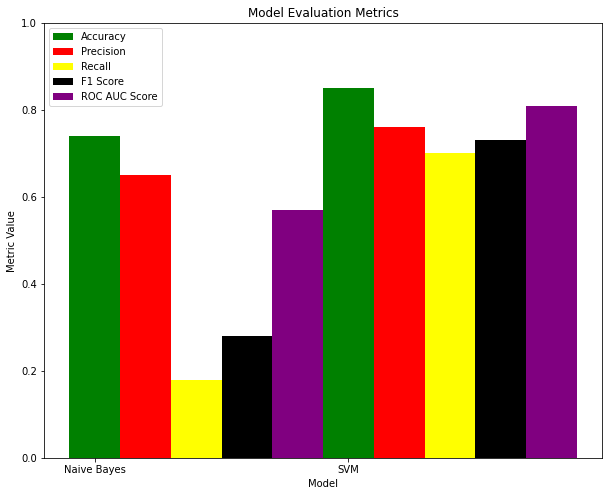

In [234]:
# import necessary libraries
import matplotlib.pyplot as plt

# Create a list of evaluation metric values for each model
accuracies = [0.74, 0.85]
precisions = [0.65, 0.76]
recalls = [0.18, 0.70]
f1_scores = [0.28, 0.73]
roc_scores = [0.57, 0.81 ]

# Create a list of model names
model_names = ['Naive Bayes', 'SVM']

# Set up the plot
plt.figure(figsize=(10,8))

# Set the x-axis ticks and labels
plt.xticks(range(len(model_names)), model_names)

# Set the y-axis limits
plt.ylim([0,1])

# Set the plot title and labels
plt.title('Model Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')

# Set the bar width
bar_width = 0.2

# Plot the evaluation metrics
plt.bar(range(len(model_names)), accuracies, width=bar_width, label='Accuracy',color=['green'])
plt.bar([x + bar_width for x in range(len(model_names))], precisions, width=bar_width, label='Precision', color=['red'])
plt.bar([x + 2*bar_width for x in range(len(model_names))], recalls, width=bar_width, label='Recall',color=['yellow'])
plt.bar([x + 3*bar_width for x in range(len(model_names))], f1_scores, width=bar_width, label='F1 Score',color=['black'])
plt.bar([x + 4*bar_width for x in range(len(model_names))], roc_scores, width=bar_width, label='ROC AUC Score',color=['purple'])

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


The plot compares the performance of two different models, the Naive Bayes and SVM models, on the dataset. The evaluation metrics used in the plot are accuracy, precision, recall, F1 score, and ROC AUC score. The SVM model performs better than the Naive Bayes model in all five of these metrics. For example, the SVM model has an accuracy of 0.85, while the Naive Bayes model has an accuracy of 0.74. Similarly, the SVM model has a precision of 0.76, a recall of 0.70, an F1 score of 0.73, and a ROC AUC score of 0.81, while the Naive Bayes model has a precision of 0.65, a recall of 0.18, an F1 score of 0.28, and a ROC AUC score of 0.57. Overall, based on these evaluation metrics, it appears that the SVM model performs better on this dataset than the Naive Bayes model.





saved model

In [236]:
import joblib

In [238]:
joblib.dump(pipe,'deploy/model/pipe.pkl')
joblib.dump(gnb,'deploy/model/gnb.pkl')

['deploy/model/gnb.pkl']

In [286]:
joblib.dump(raw_svm,'deploy/model/svm.pkl')

['deploy/model/svm.pkl']

In [261]:
g =  pd.DataFrame([
            323,
            43,
            52,
            535,
            435]).values

In [262]:
pca.transform(g)

array([[598.49005205, 185.34036702],
       [ 79.67514625,  24.67379499],
       [ 96.35133965,  29.83807766],
       [991.30705216, 306.98791442],
       [806.01601437, 249.60699584]])

In [260]:
pca.transform(g)

array([[598.49005205, 185.34036702],
       [ 79.67514625,  24.67379499],
       [ 96.35133965,  29.83807766],
       [991.30705216, 306.98791442],
       [806.01601437, 249.60699584]])

In [276]:
g = [[   0],
 [  43],
 [ 832],
 [ 823],
 [8984],
 [ 323]]
g

[[0], [43], [832], [823], [8984], [323]]

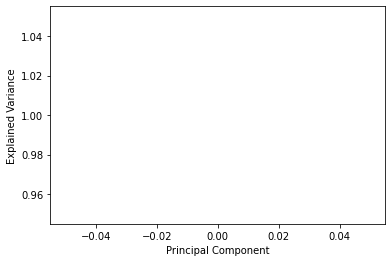

In [277]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# standard scale and use pca
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])

# Fit the PCA to the data
pipe.fit(g)

# Get the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance by each principal component
plt.plot(explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()
